# Decision tree on bert embeddings

In [1]:
import utilities
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
import re
import sklearn
import random
import textdistance
import umap

from sklearn.tree              import DecisionTreeClassifier
from sklearn.model_selection   import train_test_split
from sklearn                   import metrics
from sklearn.model_selection   import GridSearchCV
from transformers              import BertTokenizer, BertModel
from sentence_transformers     import SentenceTransformer
from sklearn.metrics           import roc_curve
from umap                      import UMAP
from typing                    import Optional
from sklearn.decomposition     import PCA
from sklearn.linear_model      import LogisticRegression

C:\Users\a.tekiouk\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\a.tekiouk\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\a.tekiouk\AppData\Local\Programs\Py

In [2]:
chanel_junk_valid_new = pd.read_excel('C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/chanel_junk_valid_2.xlsx')

## Bert

In [8]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

## Sentence transformers 

Example

In [3]:
model_example = SentenceTransformer('all-MiniLM-L6-v2')

In [4]:
#Our sentences we like to encode
sentences_test = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

In [4]:
#Sentences are encoded by calling model.encode()
embeddings_test = model_example.encode(sentences_test)

In [8]:
#Print the embeddings
for sentence, embedding in zip(sentences_test, embeddings_test):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173552e-02 -4.28515412e-02 -1.56286098e-02  1.40537675e-02
  3.95537615e-02  1.21796317e-01  2.94333659e-02 -3.17524336e-02
  3.54959927e-02 -7.93139786e-02  1.75878350e-02 -4.04370092e-02
  4.97259349e-02  2.54912134e-02 -7.18700662e-02  8.14968720e-02
  1.47072482e-03  4.79627065e-02 -4.50336114e-02 -9.92174670e-02
 -2.81769820e-02  6.45046234e-02  4.44670580e-02 -4.76217046e-02
 -3.52952480e-02  4.38671671e-02 -5.28566055e-02  4.33045556e-04
  1.01921499e-01  1.64072420e-02  3.26996632e-02 -3.45986634e-02
  1.21339280e-02  7.94871151e-02  4.58342070e-03  1.57778412e-02
 -9.68210399e-03  2.87625976e-02 -5.05806208e-02 -1.55793503e-02
 -2.87907012e-02 -9.62282438e-03  3.15556787e-02  2.27348972e-02
  8.71449485e-02 -3.85027118e-02 -8.84718373e-02 -8.75501521e-03
 -2.12343540e-02  2.08923593e-02 -9.02077407e-02 -5.25732078e-02
 -1.05638644e-02  2.88310759e-02 -1.61455162e-02  6.17835438e-03
 -1.23234

### Sentence transformer + UMAP on chanel Dataset

In [3]:
y = chanel_junk_valid_new['is_junk']

In [4]:
model1 = SentenceTransformer('all-MiniLM-L6-v2')
embeddings1 = model1.encode(chanel_junk_valid_new['text'])
X_1 = embeddings1
X_1.shape
# 500 rows, 384 cols

(500, 384)

In [5]:
manifold1 = umap.UMAP(n_components=10).fit(X_1)
X_1_reduced = manifold1.transform(X_1)

In [6]:
X_1_reduced.shape

(500, 10)

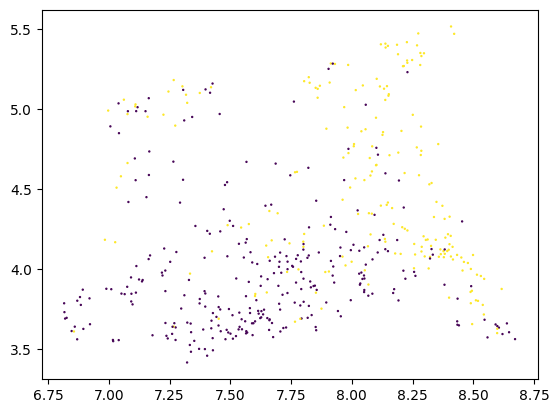

In [13]:
plt.scatter(X_1_reduced[:, 0], X_1_reduced[:, 1], c=y, s=0.5);

First Decision tree

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_1_reduced,y, test_size=0.30, random_state=42)

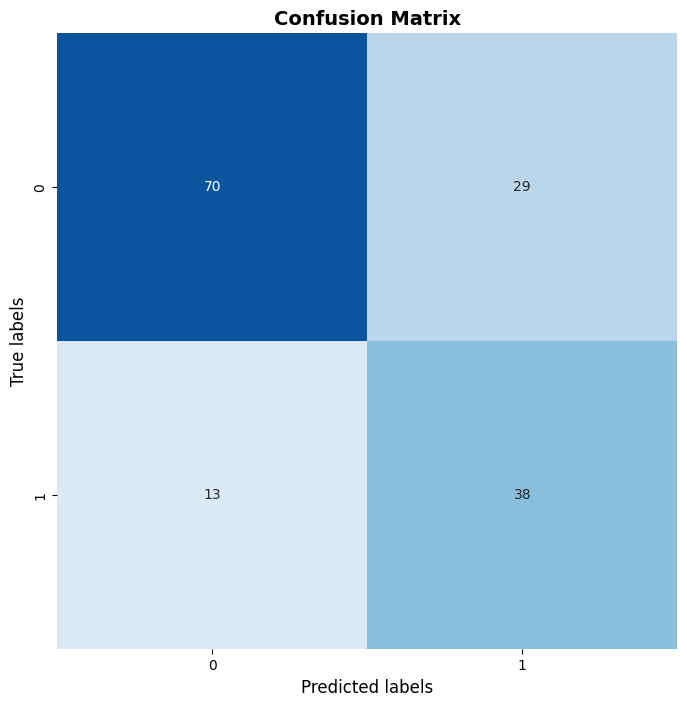

AUC : 0.7260843731431967
Accuracy score : 0.72


In [16]:
tree1 = DecisionTreeClassifier(random_state = 42,criterion = 'entropy', max_depth = 5, ccp_alpha =  0.01, min_samples_leaf = 5, max_features = 5, min_samples_split = 7)
tree1.fit(X_train,y_train)
y_pred = tree1.predict(X_test)
utilities.plot_confusion_matrix(y_true = y_test, y_pred = y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(f"AUC : {metrics.auc(fpr, tpr)}")
print(f"Accuracy score : {metrics.accuracy_score(y_test, y_pred)}")

[Text(0.5197368421052632, 0.9166666666666666, '[ 5.3073225 11.887312   8.413818   5.348967   6.4645834] <= 6.802\nentropy = 0.977\nsamples = 273\nvalue = [161, 112]\nclass = 1'),
 Text(0.25, 0.75, '[ 5.039447  11.051262   8.600581   5.5238376  5.9840107] <= 5.214\nentropy = 0.788\nsamples = 195\nvalue = [149, 46]\nclass = 1'),
 Text(0.10526315789473684, 0.5833333333333334, '[ 3.9826539 10.827535   8.624518   7.026871   7.9419327] <= 7.359\nentropy = 0.9\nsamples = 19\nvalue = [6, 13]\nclass = 0'),
 Text(0.05263157894736842, 0.4166666666666667, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = 0'),
 Text(0.15789473684210525, 0.4166666666666667, 'entropy = 0.994\nsamples = 11\nvalue = [6, 5]\nclass = 1'),
 Text(0.39473684210526316, 0.5833333333333334, '[ 4.4854593 11.11107    8.61315    6.652787   7.7426043] <= 10.652\nentropy = 0.696\nsamples = 176\nvalue = [143, 33]\nclass = 1'),
 Text(0.2631578947368421, 0.4166666666666667, '[ 5.039447  11.051262   8.600581   5.5238376  5.9840107] 

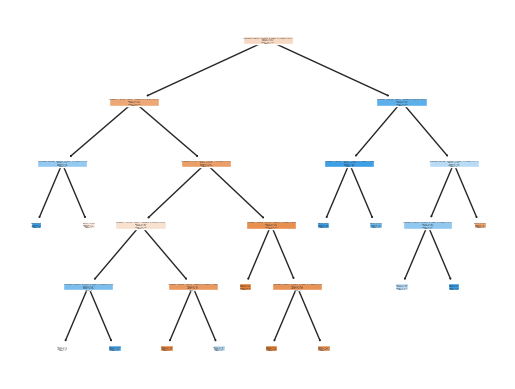

In [25]:
sklearn.tree.plot_tree(tree1,feature_names = X_train, class_names = ['1','0'], filled = True)

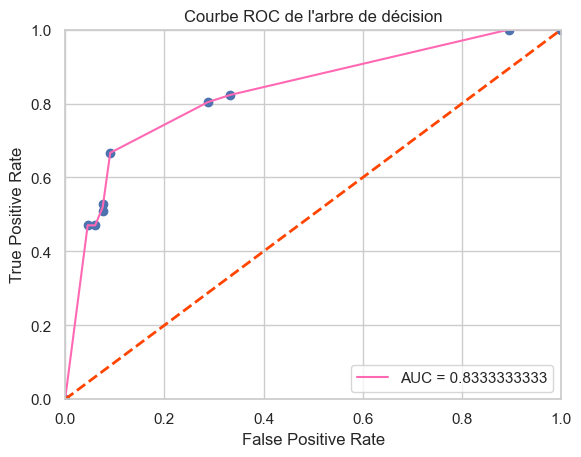

In [64]:
# Calcul des valeurs TPR et FPR
y_score = tree1.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)

# Tracé de la courbe ROC avec seaborn
sns.set(style='whitegrid', font_scale=1)
sns.lineplot(x=fpr, y=tpr, color='hotpink', label=f'AUC = {roc_auc:.10f}')
plt.plot([0, 1], [0, 1], color='orangered', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC de l\'arbre de décision')
plt.legend(loc='lower right')
plt.scatter(fpr,tpr)
plt.show()

#### Hyperparameters optimization using GridSearch

optimization using auc

In [18]:
param_grid = {  
    'criterion': ['entropy'],
    'max_depth' : np.linspace(3,15,13, dtype= int),
    'ccp_alpha' : np.linspace(0.0,0.20,21),
    'min_samples_leaf' : np.linspace(3,7,5,dtype= int),
    'max_features' : np.linspace(2,10,9,dtype= int),
    'min_samples_split' : np.linspace(3,6,4,dtype= int)
    }  

   
grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, scoring = 'roc_auc' ,refit = True, verbose = 3,n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 49140 candidates, totalling 245700 fits
{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 3}


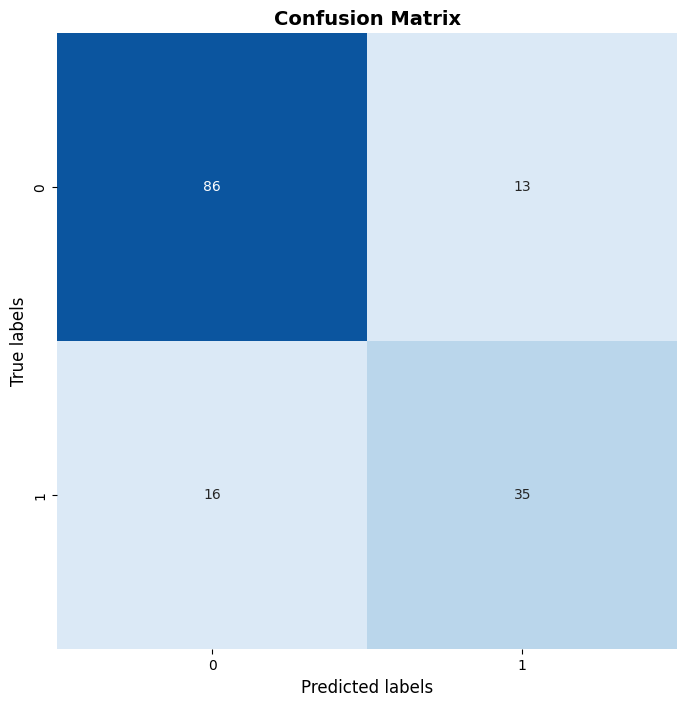

AUC : 0.7774806892453952
Accuracy score : 0.8066666666666666


In [21]:
tree_gs_auc_param = DecisionTreeClassifier(
       random_state = 42,
       criterion = 'entropy', 
       max_depth = 7, 
       ccp_alpha =  0,
       min_samples_leaf = 5, 
       max_features = 4, 
       min_samples_split = 3)
tree_gs_auc_param.fit(X_train,y_train)
y_pred = tree_gs_auc_param.predict(X_test)
utilities.plot_confusion_matrix(y_true = y_test, y_pred = y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(f"AUC : {metrics.auc(fpr, tpr)}")
print(f"Accuracy score : {metrics.accuracy_score(y_test, y_pred)}")

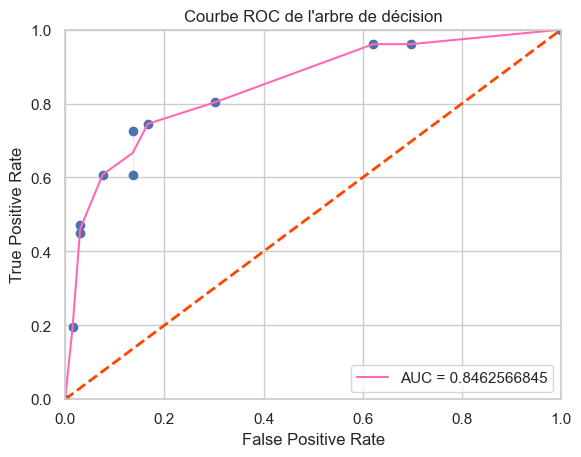

In [69]:
# Calcul des valeurs TPR et FPR
y_score = tree_gs_auc_param.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)

# Tracé de la courbe ROC avec seaborn
sns.set(style='whitegrid', font_scale=1)
sns.lineplot(x=fpr, y=tpr, color='hotpink', label=f'AUC = {roc_auc:.10f}')
plt.plot([0, 1], [0, 1], color='orangered', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC de l\'arbre de décision')
plt.legend(loc='lower right')
plt.scatter(fpr,tpr)
plt.show()

Optimization using precision

In [22]:
param_grid_ccp = {  'criterion': ['entropy'],
                    'max_depth' : np.linspace(6,8,3, dtype= int),
                    'ccp_alpha' : np.linspace(0.0,0.2,11),
                    'min_samples_leaf' : np.linspace(3,8,6,dtype= int),
                    'max_features' : np.linspace(3,5,3,dtype= int),
                    'min_samples_split' : np.linspace(2,4,3,dtype= int)
                    }  
   
grid_ccp = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid_ccp, scoring = 'precision' ,refit = True, verbose = 3,n_jobs=-1)
grid_ccp.fit(X_train, y_train)
print(grid_ccp.best_params_)


Fitting 5 folds for each of 1782 candidates, totalling 8910 fits
{'ccp_alpha': 0.12, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}


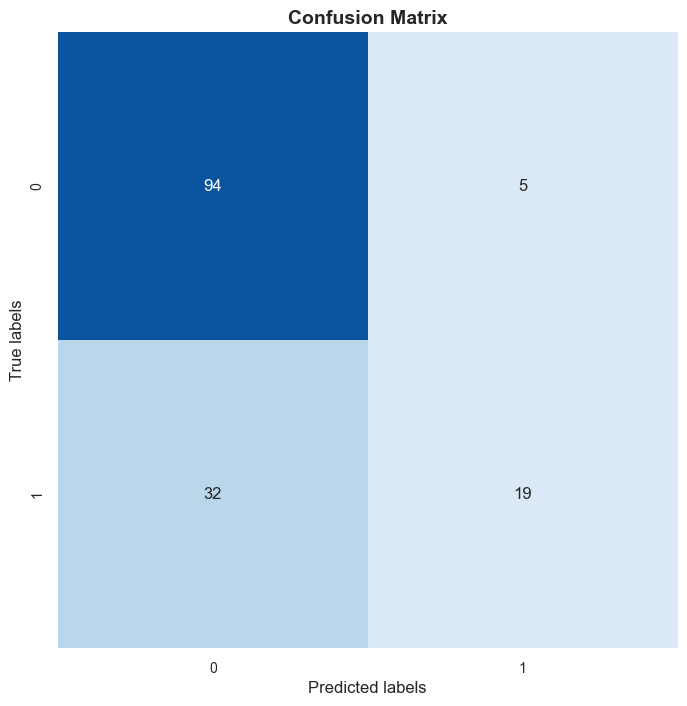

AUC : 0.6610219845513963
Accuracy score : 0.7533333333333333


In [30]:
tree_gs_prec_param = DecisionTreeClassifier(random_state = 42,
                                       criterion = 'entropy', 
                                       max_depth = 6, 
                                       ccp_alpha =  0.12,
                                       min_samples_leaf = 3, 
                                       max_features = 4, 
                                       min_samples_split = 2)
tree_gs_prec_param.fit(X_train,y_train)
y_pred = tree_gs_prec_param.predict(X_test)
utilities.plot_confusion_matrix(y_true = y_test, y_pred = y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(f"AUC : {metrics.auc(fpr, tpr)}")
print(f"Accuracy score : {metrics.accuracy_score(y_test, y_pred)}")

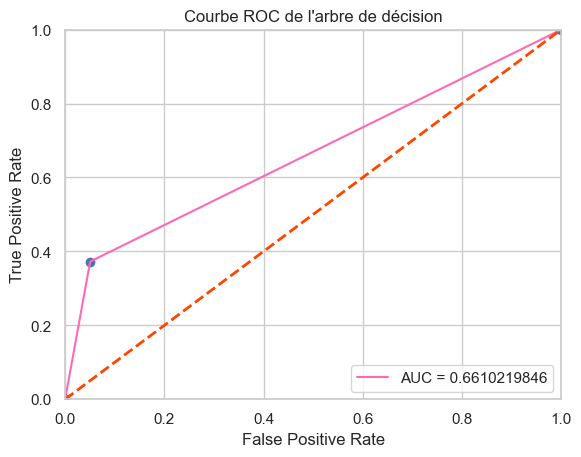

In [27]:
# Calcul des valeurs TPR et FPR
y_score = tree_gs_prec_param.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)

# Tracé de la courbe ROC avec seaborn
sns.set(style='whitegrid', font_scale=1)
sns.lineplot(x=fpr, y=tpr, color='hotpink', label=f'AUC = {roc_auc:.10f}')
plt.plot([0, 1], [0, 1], color='orangered', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC de l\'arbre de décision')
plt.legend(loc='lower right')
plt.scatter(fpr,tpr)
plt.show()

In [28]:
fpr,tpr

(array([0.        , 0.05050505, 1.        ]),
 array([0.        , 0.37254902, 1.        ]))